# Question 1

In [3]:
# Step 1: Import the necessary libraries
import pandas as pd

def analyze_users_data():
    # Step 2: Import the dataset
    url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
    
    #Step 3: Assign it to a variable called users
    users = pd.read_csv(url, sep='|')
    
    # Step 4: Discover what is the mean age per occupation
    mean_age_per_occupation = users.groupby('occupation')['age'].mean().round(2)
    print("Mean age per occupation:\n", mean_age_per_occupation)
    
    # Step 5: Discover the Male ratio per occupation and sort it from the most to the least
    male_ratio_per_occupation = (
        users[users['gender'] == 'M'].groupby('occupation').size() /
        users.groupby('occupation').size()
    ).sort_values(ascending=False).round(2)
    print("\nMale ratio per occupation (sorted):\n", male_ratio_per_occupation)
    
    # Step 6: For each occupation, calculate the minimum and maximum ages
    min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
    print("\nMinimum and maximum ages per occupation:\n", min_max_age_per_occupation)
    
    # Step 7: For each combination of occupation and sex, calculate the mean age
    mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean().round(2)
    print("\nMean age per occupation and gender:\n", mean_age_per_occupation_sex)
    
    # Step 8: For each occupation, present the percentage of women and men
    gender_percentage_per_occupation = users.groupby('occupation')['gender'].value_counts(normalize=True).unstack().round(2)
    print("\nPercentage of women and men per occupation:\n", gender_percentage_per_occupation)

# Call the function to perform the analysis and print the outputs
analyze_users_data()


Mean age per occupation:
 occupation
administrator    38.75
artist           31.39
doctor           43.57
educator         42.01
engineer         36.39
entertainment    29.22
executive        38.72
healthcare       41.56
homemaker        32.57
lawyer           36.75
librarian        40.00
marketing        37.62
none             26.56
other            34.52
programmer       33.12
retired          63.07
salesman         35.67
scientist        35.55
student          22.08
technician       33.15
writer           36.31
Name: age, dtype: float64

Male ratio per occupation (sorted):
 occupation
doctor           1.00
engineer         0.97
technician       0.96
retired          0.93
programmer       0.91
executive        0.91
scientist        0.90
entertainment    0.89
lawyer           0.83
salesman         0.75
educator         0.73
student          0.69
other            0.66
marketing        0.62
writer           0.58
none             0.56
administrator    0.54
artist           0.54
librarian

# Question 2

In [4]:
# Step 1: Import the necessary libraries
import pandas as pd

def euro_teams_analysis():
    # Step 2: Import the dataset
    url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
    
     # Step 3: Select only the Goal column
    euro12 = pd.read_csv(url)
    
    # Step 4: Select only the Goal column
    goals = euro12['Goals']
    print("Goals column:\n", goals)
    
    # Step 5: How many teams participated in the Euro2012?
    num_teams = euro12['Team'].nunique()
    print("\nNumber of teams participated in Euro2012:", num_teams)
    
    # Step 6: What is the number of columns in the dataset?
    num_columns = euro12.shape[1]
    print("\nNumber of columns in the dataset:", num_columns)
    
    # Step 7: View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
    discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
    print("\nDiscipline dataframe:\n", discipline)
    
    # Step 8: Sort the teams by Red Cards, then by Yellow Cards
    sorted_teams = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
    print("\nTeams sorted by Red Cards then Yellow Cards:\n", sorted_teams)
    
    # Step 9: Calculate the mean Yellow Cards given per Team
    mean_yellow_cards = euro12['Yellow Cards'].mean()
    print("\nMean Yellow Cards per Team:", mean_yellow_cards)
    
    # Step 10: Filter teams that scored more than 6 goals
    high_scoring_teams = euro12[euro12['Goals'] > 6]['Team']
    print("\nTeams that scored more than 6 goals:\n", high_scoring_teams)
    
    # Step 11: Select the teams that start with G
    teams_starting_with_g = euro12[euro12['Team'].str.startswith('G')]['Team']
    print("\nTeams starting with 'G':\n", teams_starting_with_g)
    
    # Step 12: Select the first 7 columns
    first_7_columns = euro12.iloc[:, :7]
    print("\nFirst 7 columns:\n", first_7_columns)
    
    # Step 13: Select all columns except the last 3
    all_except_last_3_columns = euro12.iloc[:, :-3]
    print("\nAll columns except the last 3:\n", all_except_last_3_columns)
    
    # Step 14: Present only the Shooting Accuracy from England, Italy and Russia
    shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
    print("\nShooting Accuracy for England, Italy, and Russia:\n", shooting_accuracy)

# Call the function to execute the analysis
euro_teams_analysis()

Goals column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Number of teams participated in Euro2012: 16

Number of columns in the dataset: 35

Discipline dataframe:
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spa

# Question 3

In [6]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

def housing_data_analysis():
    # Step 2: Create 3 different Series, each of length 100
    np.random.seed(0)  # For reproducibility
    s1 = pd.Series(np.random.randint(1, 5, size=100))
    s2 = pd.Series(np.random.randint(1, 4, size=100))
    s3 = pd.Series(np.random.randint(10000, 30001, size=100))
    
    # Step 3: Create a DataFrame by joining the Series by column
    df = pd.concat([s1, s2, s3], axis=1)
    
    # Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter
    df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
    print("DataFrame with renamed columns:\n", df.head())
    
    # Step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
    bigcolumn = pd.concat([s1, s2, s3], axis=0).reset_index(drop=True)
    bigcolumn_df = pd.DataFrame(bigcolumn, columns=['bigcolumn'])
    print("\nBigcolumn DataFrame:\n", bigcolumn_df.head(105))  # Print first 105 rows for visibility
    
    # Step 6: Ops it seems it is going only until index 99. Is it true?
    print("\nIs the index going only until 99?", bigcolumn_df.index.max() == 99)
    
    # Step 7: Reindex the DataFrame so it goes from 0 to 299
    bigcolumn_df_reindexed = bigcolumn_df.reindex(range(300))
    print("\nReindexed bigcolumn DataFrame:\n", bigcolumn_df_reindexed.tail(10))  # Print last 10 rows for visibility

# Call the function to execute the analysis
housing_data_analysis()

DataFrame with renamed columns:
    bedrs  bathrs  price_sqr_meter
0      1       2            15021
1      4       3            11134
2      2       1            26409
3      1       1            19680
4      4       3            27340

Bigcolumn DataFrame:
      bigcolumn
0            1
1            4
2            2
3            1
4            4
..         ...
100          2
101          3
102          1
103          1
104          3

[105 rows x 1 columns]

Is the index going only until 99? False

Reindexed bigcolumn DataFrame:
      bigcolumn
290      12852
291      22464
292      19753
293      25139
294      13186
295      28161
296      29745
297      18338
298      24676
299      12562


# Question 4

In [39]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

def wind_statistics():
    # Step 2: Import the dataset from the attached file 'wind.txt'
    data = pd.read_csv('wind.txt', delim_whitespace=True)

    # Step 3: Replace the first 3 columns by a proper datetime index
    # Combine Yr, Mo, Dy into a single datetime column with explicit format
    data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
    data = data.drop(columns=['Yr', 'Mo', 'Dy'])
    data.set_index('Date', inplace=True)
    
    # Step 4: Fix Year 2061 to 1961
    def correct_year(year):
        return year if year <= 1980 else year - 100

    data.index = data.index.map(lambda date: date.replace(year=correct_year(date.year)))
    
    # Step 5: Set the right dates as the index, ensuring dtype is datetime64[ns]
    data.index = pd.to_datetime(data.index)
    
    # Step 6: Compute how many values are missing for each location over the entire record
    missing_values_per_location = data.isna().sum()
    print("Missing values per location:\n", missing_values_per_location)
    
    # Step 7: Compute how many non-missing values there are in total
    total_non_missing_values = data.notna().sum().sum()
    print("\nTotal non-missing values:", total_non_missing_values)
    
    # Step 8: Calculate the mean windspeeds over all the locations and all the times
    mean_windspeed = data.mean().mean()
    print("\nMean windspeeds over all locations and times:", mean_windspeed)
    
    # Step 9: Calculate min, max, mean, and standard deviation of windspeeds at each location
    loc_stats = data.describe().loc[['min', 'max', 'mean', 'std']]
    print("\nLocation statistics:\n", loc_stats)
    
    # Step 10: Calculate min, max, mean, and standard deviation of windspeeds across all locations each day
    day_stats = data.aggregate(['min', 'max', 'mean', 'std'], axis=1)
    print("\nDay statistics:\n", day_stats.head())
    
    # Step 11: Find the average windspeed in January for each location
    january_avg = data[data.index.month == 1].mean()
    print("\nAverage windspeed in January for each location:\n", january_avg)
    
    # Step 12: Downsample the record to a yearly frequency for each location
    yearly = data.resample('Y').mean()
    print("\nYearly downsampled data:\n", yearly)
    
    # Step 13: Downsample the record to a monthly frequency for each location
    monthly = data.resample('M').mean()
    print("\nMonthly downsampled data:\n", monthly)
    
    # Step 14: Downsample the record to a weekly frequency for each location
    weekly = data.resample('W').mean()
    print("\nWeekly downsampled data:\n", weekly)
    
    # Step 15: Calculate min, max, mean, and standard deviation across all locations for each week for the first 52 weeks
    first_52_weeks = data.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[:52]
    print("\nStatistics for the first 52 weeks:\n", first_52_weeks)

# Call the function to execute the analysis
wind_statistics()

Missing values per location:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total non-missing values: 78857

Mean windspeeds over all locations and times: 10.227982360836938

Location statistics:
             RPT        VAL        ROS        KIL        SHA        BIR  \
min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   
max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000   
mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   
std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   

            DUB        CLA        MUL        CLO        BEL        MAL  
min    0.000000   0.000000   0.000000   0.040000   0.130000   0.670000  
max   30.370000  31.080000  25.880000  28.210000  42.380000  42.540000  
mean   9.797343   8.495053   8.493590   8.707332  13.121007  15.599079  
std    4.977555   4.499449   4.166872   4.503954   5.835037   6.

# Question 5

In [8]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

# Step 3: Assign it to a variable called chipo
chipo = pd.read_csv(url, sep='\t')

# Step 4: See the first 10 entries
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [9]:
# Step 5: What is the number of observations in the dataset?
num_observations = chipo.shape[0]
print("Number of observations:", num_observations)

Number of observations: 4622


In [10]:
# Step 6: What is the number of columns in the dataset?
num_columns = chipo.shape[1]
print("Number of columns:", num_columns)

Number of columns: 5


In [11]:
# Step 7: Print the name of all the columns
print("Column names:", chipo.columns.tolist())

Column names: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [12]:
# Step 8: How is the dataset indexed?
print("Dataset index:", chipo.index)

Dataset index: RangeIndex(start=0, stop=4622, step=1)


In [13]:
# Step 9: Which was the most-ordered item?
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("Most-ordered item:", most_ordered_item)

Most-ordered item: Chicken Bowl


In [14]:
# Step 10: For the most-ordered item, how many items were ordered?
most_ordered_quantity = chipo['quantity'][chipo['item_name'] == most_ordered_item].sum()
print("Number of items ordered for most-ordered item:", most_ordered_quantity)

Number of items ordered for most-ordered item: 761


In [15]:
# Step 11: What was the most ordered item in the choice_description column?
most_ordered_choice_description = chipo['choice_description'].value_counts().idxmax()
print("Most ordered item in choice_description:", most_ordered_choice_description)

Most ordered item in choice_description: [Diet Coke]


In [16]:
# Step 12: How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered:", total_items_ordered)

Total items ordered: 4972


In [17]:
# Step 13:
# • Convert the 'item_price' column to string type if it's not already
chipo['item_price'] = chipo['item_price'].astype(str)

# • Remove the dollar sign and convert the column to float
chipo['item_price'] = chipo['item_price'].str.replace(r'\$', '', regex=True).astype(float)

print(chipo)

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description  item_price  
0                                                   NaN        2.39  
1                                          [Clementine]

In [18]:
# • Check the item price type
print("Item price type:", chipo['item_price'].dtype)

Item price type: float64


In [19]:
# Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue:", revenue)

Total revenue: 39237.02


In [20]:
# Step 15: How many orders were made in the period?
total_orders = chipo['order_id'].nunique()
print("Total orders:", total_orders)

Total orders: 1834


In [21]:
# Step 16: What is the average revenue amount per order?
average_revenue_per_order = revenue / total_orders

# Round the result to two decimal places
average_revenue_per_order = round(average_revenue_per_order, 2)

print("Average revenue per order:", average_revenue_per_order)

Average revenue per order: 21.39


In [22]:
# Step 17: How many different items are sold?
different_items_sold = chipo['item_name'].nunique()
print("Number of different items sold:", different_items_sold)

Number of different items sold: 50


# Question 6

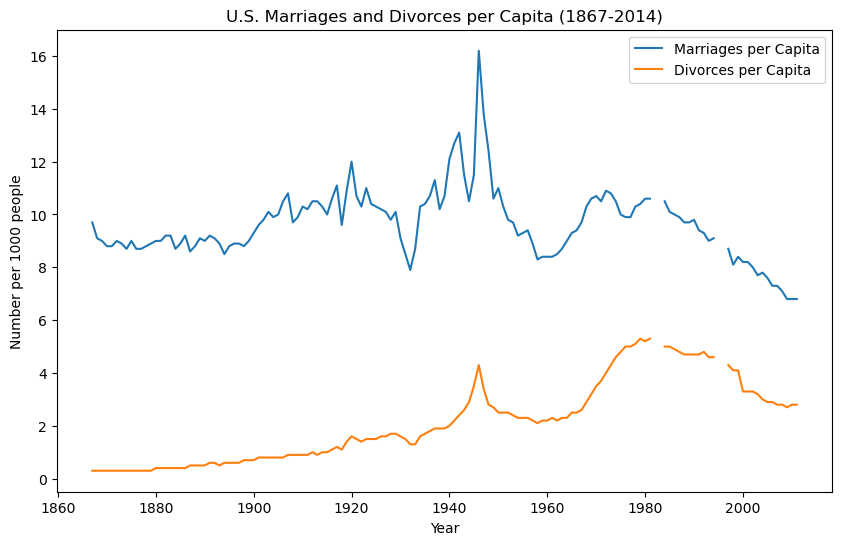

In [40]:
# Step 1: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
file_path = "us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)

# Step 3: Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per Capita')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per Capita')

# Step 4: Label the axes
plt.xlabel('Year')
plt.ylabel('Number per 1000 people')

# Step 5: Add a title to the plot
plt.title('U.S. Marriages and Divorces per Capita (1867-2014)')

# Step 6: Show the legend
plt.legend()

# Step 7: Show the plot
plt.show()

# Question 7

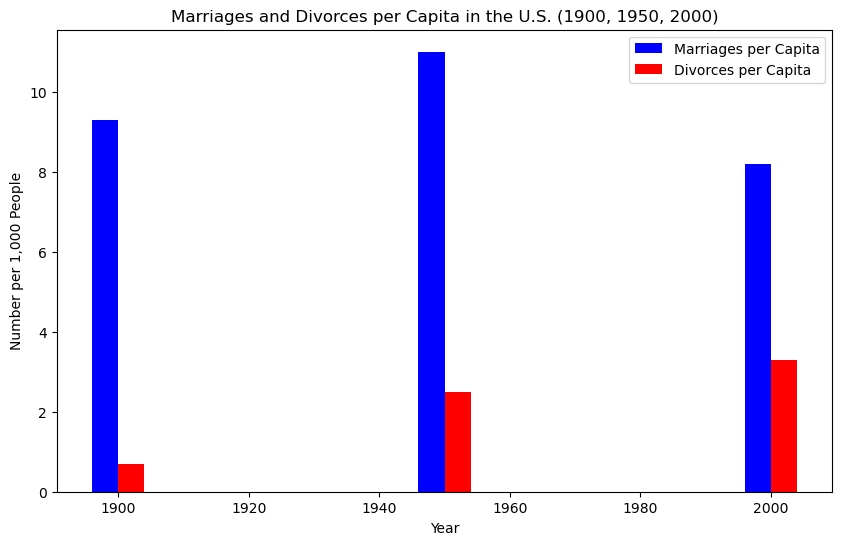

In [41]:
# Step 1: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)

# Filter the data for the years 1900, 1950, and 2000
selected_years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(selected_years)]

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Create bars for marriages per capita
plt.bar(filtered_data['Year'] - 2, filtered_data['Marriages_per_1000'], width=4, label='Marriages per Capita', color='blue')

# Create bars for divorces per capita
plt.bar(filtered_data['Year'] + 2, filtered_data['Divorces_per_1000'], width=4, label='Divorces per Capita', color='red')

# Labeling the axes
plt.xlabel('Year')
plt.ylabel('Number per 1,000 People')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Question 8

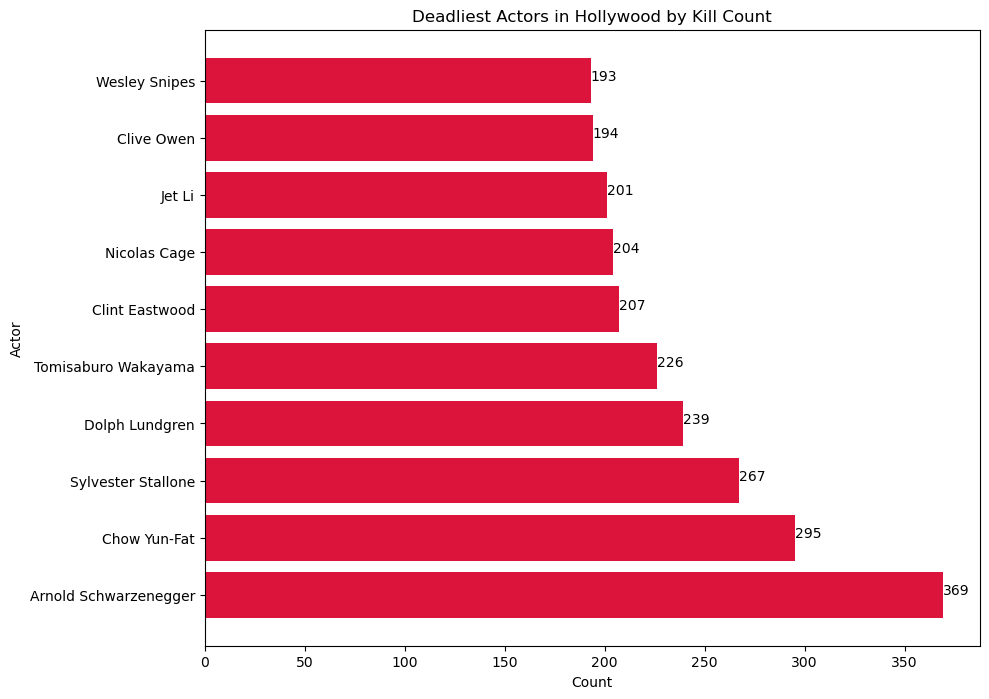

In [42]:
# Step 1: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "actor_kill_counts.csv"
data = pd.read_csv(file_path)

# Sort the data by kill count in descending order
data_sorted = data.sort_values(by='Count', ascending=False)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 8))

# Create horizontal bars
plt.barh(data_sorted['Actor'], data_sorted['Count'], color='crimson')

# Labeling the axes
plt.xlabel('Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood by Kill Count')

# Add kill count labels on each bar
for index, value in enumerate(data_sorted['Count']):
    plt.text(value, index, str(value))

# Show the plot
plt.show()

# Question 9

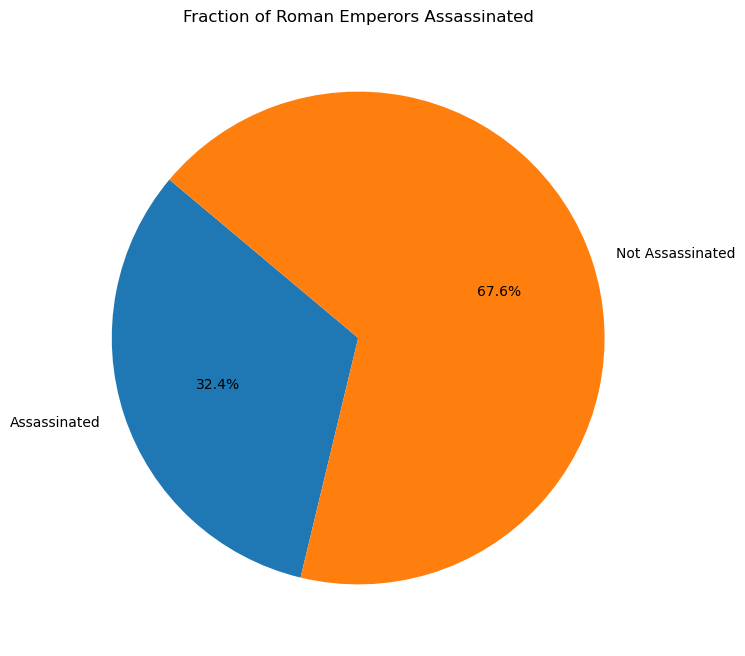

In [43]:
# Step 1: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
file_path = "roman-emperor-reigns.csv"
data = pd.read_csv(file_path)

# Step 3: Count the number of emperors who were assassinated vs. those who were not
assassinated_count = data['Cause_of_Death'].value_counts()['Assassinated']
not_assassinated_count = len(data) - assassinated_count

# Step 4: Prepare the data for the pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_count, not_assassinated_count]

# Step 5: Create the pie chart
plt.figure(figsize=(8, 8))  # Ensure the pie chart is an even circle
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Step 6: Add a title to the chart
plt.title('Fraction of Roman Emperors Assassinated')

# Step 7: Display the pie chart
plt.show()

# Question 10 

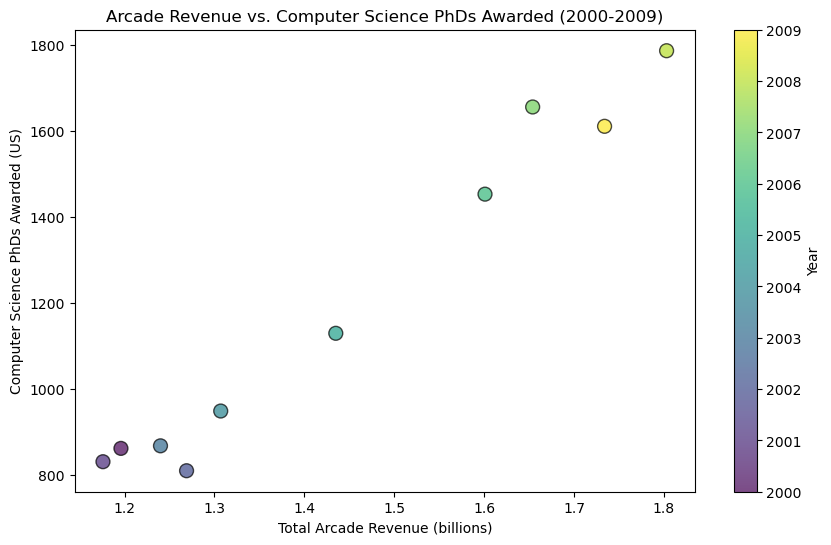

In [45]:
# Step 1: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
file_path = "arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(file_path)

# Step 3: Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data['Total Arcade Revenue (billions)'], 
    data['Computer Science Doctorates Awarded (US)'], 
    c=data['Year'], 
    cmap='viridis', 
    s=100, 
    edgecolor='k', 
    alpha=0.7
)

# Step 4: Label the axes
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science PhDs Awarded (US)')

# Step 5: Add a title to the plot
plt.title('Arcade Revenue vs. Computer Science PhDs Awarded (2000-2009)')

# Step 6: Add a color bar to indicate the year
colorbar = plt.colorbar(scatter)
colorbar.set_label('Year')

# Step 7: Show the plot
plt.show()